An example: a urgent care call sample
This case study uses a simple model of an urgent care telephone call centre, similar to the NHS 111 service in the UK. To learn simpy we will first build a very simple model. In our first iteration of this model, calls to the centre arrive deterministically. For now we will ignore resources and activities in the model and just model a deterministic arrival process. The simulation time units are in minutes. Let's assume there are 60 new callers per hour (an fixed inter-arrival time of 1.0 per minute).

Step by Step

# simpy has process based worldview. These processes take place in an environment. You can create a environment with the following line of code:

env = simpy.Environment()

# We can introduce delays or activities into a process. For example these might be the duration of a stay on a ward, or the duration of a operation - or, in this case, a delay between arrivals (inter-arrival time). In simpy you control this with the following method:(60/60 caller per minute)

env.timeout(1.0)

# Generators
  # The events in the DES are modelled and scheduled in simpy using python generators (i.e. they are the "event-processing mechanism"). A generator is a function that behaves like an iterator, meaning it can yield a sequence of values when iterated over.  

  # For example, below is a basic generator function that yields a new arrival every 1 minute. It takes the environment as a parameter. It then internally calls the env.timeout() method in an infinite loop.

def arrivals_generator(env):
    while True:
        yield env.timeout(1.0)   

# SimPy process and run
Once we have coded the model logic and created an environment instance, there are two remaining instructions we need to code.

1. Set the generator up as a SimPy process using env.process()
  env.process(arrivals_generator(env))

2. Run the environment for a user specified run length using env.run()
  env.run(until=25)
  
The run method handle the infinite loop we set up in arrivals_generator. The simulation model has an internal concept of time. It will end execution when its internal clock reaches 25 time units.

In [6]:
import simpy

def arrivals_generator(env):
    '''
    Callers arrive with a fixed inter-arrival time of 1.0 minutes (60 min/60 callers).

    Parameters:
    ------
    env: simpy.Environment
    '''
    
    # don't worry about the infinite while loop, simpy will
    # exit at the correct time.
    while True:
        
        # sample an inter-arrival time.
        inter_arrival_time = 0.6
        
        # we use the yield keyword instead of return
        yield env.timeout(inter_arrival_time)
        
        # print out the time of the arrival
        print(f'Call arrives at: {env.now}')

# Now that we have our generator function we can setup the environment, process and call run. We will create a RUN_LENGTH parameter that you can change to run the model for different time lengths.        
RUN_LENGTH = 25  # in minutes

# create the simpy environment
env = simpy.Environment()

# create the arrival process
env.process(arrivals_generator(env))

# run the simulation
env.run(until=RUN_LENGTH)
print(f'End of run, Simulation ended at: {env.now}')

Call arrives at: 0.6
Call arrives at: 1.2
Call arrives at: 1.7999999999999998
Call arrives at: 2.4
Call arrives at: 3.0
Call arrives at: 3.6
Call arrives at: 4.2
Call arrives at: 4.8
Call arrives at: 5.3999999999999995
Call arrives at: 5.999999999999999
Call arrives at: 6.599999999999999
Call arrives at: 7.199999999999998
Call arrives at: 7.799999999999998
Call arrives at: 8.399999999999999
Call arrives at: 8.999999999999998
Call arrives at: 9.599999999999998
Call arrives at: 10.199999999999998
Call arrives at: 10.799999999999997
Call arrives at: 11.399999999999997
Call arrives at: 11.999999999999996
Call arrives at: 12.599999999999996
Call arrives at: 13.199999999999996
Call arrives at: 13.799999999999995
Call arrives at: 14.399999999999995
Call arrives at: 14.999999999999995
Call arrives at: 15.599999999999994
Call arrives at: 16.199999999999996
Call arrives at: 16.799999999999997
Call arrives at: 17.4
Call arrives at: 18.0
Call arrives at: 18.6
Call arrives at: 19.200000000000003
Ca

3. Exercise: Modelling a poisson arrival process for prescriptions
Task:

Update arrivals_generator() so that inter-arrival times follow an exponential distribution with a mean inter-arrival time of 60.0 / 100 minutes between arrivals (i.e. 100 arrivals per hour). Use a run length of 25 minutes.

Bonus challenge:

1. First, try implementing this without setting a random seed.
2. Then, update the method with an approach to control the randomness,
Hints:

We learnt how to sample using a numpy random number generator in the sampling notebook. Excluding a random seed, the basic method for drawing a single sample follows this pattern:
rng = np.random.default_rng()
sample = rng.exponential(scale=12.0)

In [8]:
#1. First, try implementing this without setting a random seed.
import simpy
import numpy as np

def arrivals_generator(env, random_seed=None):
    '''
    Time between caller arrivals follows an Expoential distribution with mean
    inter-arrival time of 60.0/100.0 minutes
    
    Parameters:
    ------
    env: simpy.Environment
    
    random_seed: int, optional (default=None)
        if set then used as random seed to control sampling.
    '''
    rs_arrivals = np.random.default_rng(random_seed)
    
    while True:
        inter_arrival_time = rs_arrivals.exponential(60.0/100.0)
        yield env.timeout(inter_arrival_time)
        print(f'Call arrives at: {env.now}')

# model parameters
RUN_LENGTH = 25

# create the simpy environment object
env = simpy.Environment()

# tell simpy that the `arrivals_generator` is a process
env.process(arrivals_generator(env))

# run the simulation model
env.run(until=RUN_LENGTH)
print(f'end of run. simulation clock time = {env.now}')        

Call arrives at: 0.08907816287727746
Call arrives at: 0.25736224022841725
Call arrives at: 1.0868660811647768
Call arrives at: 1.8550322947485691
Call arrives at: 2.19548892543412
Call arrives at: 2.4792612993925234
Call arrives at: 2.645567543136931
Call arrives at: 2.746471875923888
Call arrives at: 3.096791327571897
Call arrives at: 3.289549306021156
Call arrives at: 4.604139375636622
Call arrives at: 5.34383823776812
Call arrives at: 6.189658831087523
Call arrives at: 7.319052382412993
Call arrives at: 7.848720062354103
Call arrives at: 8.098189481571671
Call arrives at: 10.800590974393396
Call arrives at: 10.922022810195708
Call arrives at: 11.493923851889509
Call arrives at: 13.08373881919246
Call arrives at: 13.453849432963697
Call arrives at: 13.701639505875121
Call arrives at: 14.223096112277844
Call arrives at: 14.645533520162074
Call arrives at: 15.279381505957438
Call arrives at: 15.688860399894018
Call arrives at: 16.064351959734704
Call arrives at: 16.525345230721285
Call


Scenario 1: Current Setup (1 Teller, 1 ATM)
Customer 1 arrives at 1.53 min
Customer 2 arrives at 1.57 min
Customer 1 finished ATM at 2.72 min
Customer 2 finished ATM at 3.75 min
Customer 3 arrives at 4.91 min
Customer 4 arrives at 5.96 min
Customer 3 finished ATM at 6.06 min
Customer 5 arrives at 6.34 min
Customer 6 arrives at 6.35 min
Customer 7 arrives at 8.14 min
Customer 8 arrives at 8.40 min
Customer 9 arrives at 9.01 min
Customer 8 finished ATM at 9.58 min
Customer 10 arrives at 11.48 min
Customer 11 arrives at 12.64 min
Customer 12 arrives at 13.35 min
Customer 13 arrives at 16.00 min
Customer 14 arrives at 18.97 min
Customer 4 finished teller service at 19.23 min
Customer 14 finished ATM at 20.02 min
Customer 15 arrives at 20.80 min
Customer 16 arrives at 20.96 min
Customer 17 arrives at 21.31 min
Customer 5 finished teller service at 21.35 min
Customer 15 finished ATM at 22.00 min
Customer 16 finished ATM at 23.17 min
Customer 18 arrives at 25.45 min
Customer 19 arrives at 26

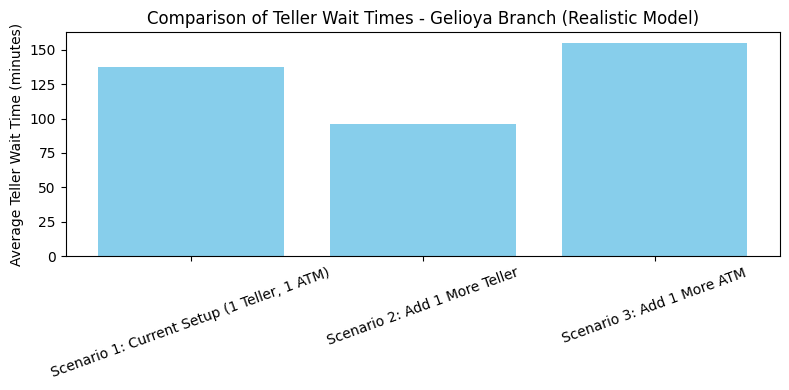

In [3]:
import simpy
import random
import statistics
import matplotlib.pyplot as plt

# -----------------------------
# Simulation Parameters (Sri Lankan Bank realistic)
# -----------------------------
RANDOM_SEED = 42
SIM_TIME = 360          # 6 hours (minutes)
INTER_ARRIVAL = 1.5     # average 1.5 min between arrivals

# Service times (in minutes)
TELLER_SERVICE_TIME = 8    # average teller service time
# ATM now uses: operating_time + transaction_time (see below)

# -----------------------------
# Data Collection
# -----------------------------
wait_times_teller = []
wait_times_atm = []
queue_lengths_teller = []
queue_lengths_atm = []

# -----------------------------
# Customer Process
# -----------------------------
def customer(env, name, teller, atm):
    arrival_time = env.now
    print(f"{name} arrives at {arrival_time:.2f} min")

    # Decide whether customer uses ATM or Teller
    if random.random() < 0.3:  # 30% use ATM
        with atm.request() as request:
            yield request
            wait = env.now - arrival_time
            wait_times_atm.append(wait)

            # Separate service components
            operating_time = random.uniform(0.6, 0.9)   # inserting card, selecting menu
            transaction_time = random.uniform(0.3, 0.6) # cash withdrawal
            total_service_time = operating_time + transaction_time

            # occasional slow user
            if random.random() < 0.05:
                total_service_time += random.uniform(0.5, 1.0)

            yield env.timeout(total_service_time)
            print(f"{name} finished ATM at {env.now:.2f} min")

    else:
        with teller.request() as request:
            yield request
            wait = env.now - arrival_time
            wait_times_teller.append(wait)

            service_time = random.expovariate(1.0 / TELLER_SERVICE_TIME)
            yield env.timeout(service_time)
            print(f"{name} finished teller service at {env.now:.2f} min")

# -----------------------------
# Customer Arrival Generator
# -----------------------------
def customer_arrivals(env, teller, atm):
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / INTER_ARRIVAL))
        i += 1
        env.process(customer(env, f"Customer {i}", teller, atm))
        queue_lengths_teller.append(len(teller.queue))
        queue_lengths_atm.append(len(atm.queue))

# -----------------------------
# Run Simulation
# -----------------------------
def run_simulation(num_tellers=1, num_atms=1, arrival_rate=INTER_ARRIVAL):
    global INTER_ARRIVAL
    INTER_ARRIVAL = arrival_rate

    wait_times_teller.clear()
    wait_times_atm.clear()
    queue_lengths_teller.clear()
    queue_lengths_atm.clear()

    random.seed(RANDOM_SEED)
    env = simpy.Environment()

    teller = simpy.Resource(env, capacity=num_tellers)
    atm = simpy.Resource(env, capacity=num_atms)

    env.process(customer_arrivals(env, teller, atm))
    env.run(until=SIM_TIME)

    avg_wait_teller = statistics.mean(wait_times_teller) if wait_times_teller else 0
    avg_wait_atm = statistics.mean(wait_times_atm) if wait_times_atm else 0

    print("\n----- Simulation Results -----")
    print(f"Avg Teller Wait Time: {avg_wait_teller:.2f} mins")
    print(f"Avg ATM Wait Time: {avg_wait_atm:.2f} mins")
    print(f"Max Teller Queue: {max(queue_lengths_teller, default=0)}")
    print(f"Max ATM Queue: {max(queue_lengths_atm, default=0)}")

    return avg_wait_teller, avg_wait_atm

# -----------------------------
# Scenarios
# -----------------------------
scenarios = {
    "Scenario 1: Current Setup (1 Teller, 1 ATM)": (1, 1, 1.5),
    "Scenario 2: Add 1 More Teller": (2, 1, 1.5),
    "Scenario 3: Add 1 More ATM": (1, 2, 1.5)
}

results = {}

for name, (tellers, atms, arrival) in scenarios.items():
    print("\n===============================")
    print(name)
    print("===============================")
    avg_teller, avg_atm = run_simulation(num_tellers=tellers, num_atms=atms, arrival_rate=arrival)
    results[name] = (avg_teller, avg_atm)

# -----------------------------
# Plot Results
# -----------------------------
plt.figure(figsize=(8, 4))
plt.bar(results.keys(), [v[0] for v in results.values()], color='skyblue')
plt.ylabel('Average Teller Wait Time (minutes)')
plt.title('Comparison of Teller Wait Times - Gelioya Branch (Realistic Model)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
